In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:

from neural_network import NeuralNetwork
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import torch
import pickle

In [35]:
def data_generator(batch_size):
    '''
    This function generates batches of data
    Parameters:
        data: The data to be batched
        batch_size: The size of the batch
    '''
    x = np.random.random((batch_size, 4))
    y = np.array([np.mean(x, axis=1)+np.random.randn(batch_size)*0.01, np.std(x, axis=1)+np.random.randn(batch_size)*0.01]).T
    
    return x, y

In [36]:
# loda data
filename = '../data/data_example.pkl' ## Replace with your own path
with open(filename, 'rb') as f:
    data = pickle.load(f)

state = np.array(data[0])
action = np.array(data[1])


In [37]:
model = NeuralNetwork(state.shape[-1], 1, lr=1e-3, save_dir="../models")

In [38]:
loss_hist = []
x_train = torch.from_numpy(state).float().to(model.device)
y_train = torch.from_numpy(action).float().reshape(-1, 1).to(model.device)
with tqdm.tqdm(range(100000)) as t:
    for _ in t:
        loss = model.train_step(x_train, y_train)
        loss_hist.append(loss)
        t.set_description(f"Loss: {loss:.4f}")
    

Loss: 0.0055: 100%|██████████| 100000/100000 [04:11<00:00, 398.19it/s]


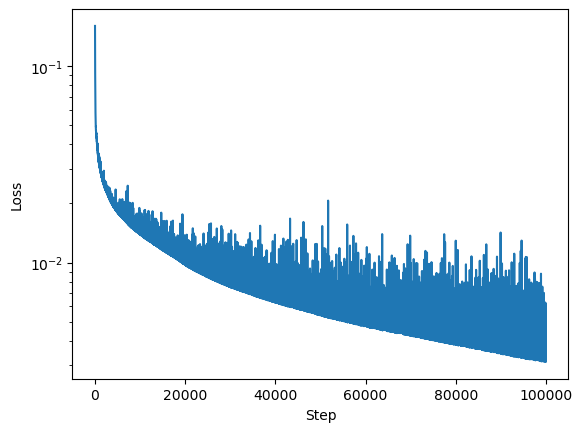

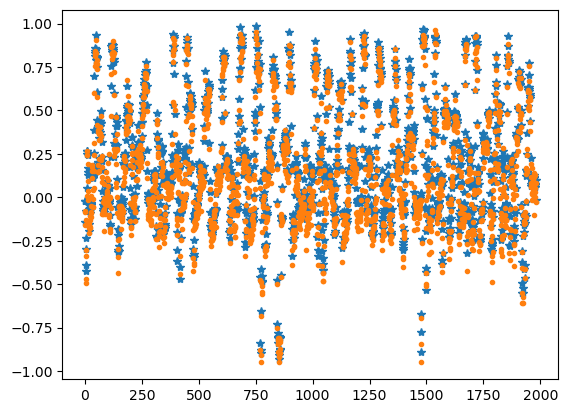

In [41]:

plt.plot(loss_hist)
plt.yscale('log')
plt.xlabel('Step')
plt.ylabel('Loss')

plt.figure()
y_pred = model.inference_step(state)
plt.plot(action, '*', label="y")
plt.plot(y_pred, '.', label="y_pred")

In [42]:
model.save_model('model_example.pt')

Model saved to  ../models/model_example.pt
